In [29]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

# Импорт модулей для работы с базой данных
import sqlite3
from sqlalchemy import create_engine

In [30]:
# Названия признаков для German Credit Data (числовой формат)
column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings', 'employment', 'installment_rate', 'personal_status_sex',
    'age', 'other_debtors', 'present_residence', 'property', 'other_installment_plans',
    'housing', 'existing_credits', 'job', 'num_dependents', 'telephone', 'foreign_worker',
    'class'
]

# Загрузка данных из файла
df = pd.read_csv('german.data-numeric', sep='\s+', names=column_names, header=None)

# Просмотр первых строк данных
print("Размер датасета:", df.shape)
df.head()

Размер датасета: (1000, 21)


status  duration  credit_history  purpose  credit_amount  savings  \
1 6  4 12       5         5               3        4              1       67   
2 48 2 60       1         3               2        2              1       22   
4 12 4 21       1         4               3        3              1       49   
1 42 2 79       1         4               3        4              2       45   
  24 3 49       1         3               3        4              4       53   

           employment  installment_rate  personal_status_sex  age  ...  \
1 6  4 12           3                 2                    1    2  ...   
2 48 2 60           3                 1                    1    1  ...   
4 12 4 21           3                 1                    2    1  ...   
1 42 2 79           3                 1                    2    1  ...   
  24 3 49           3                 2                    2    1  ...   

           present_residence  property  other_installment_plans  housing  \
1 6  4 12                  0         0                        1        0   
2 48 2 60                  0         0                        1        0   
4 12 4 21                  0         0                        1        0   
1 42 2 79                  0         0                        0        0   
  24 3 49                  1         0                        1        0   

           existing_credits  job  num_dependents  telephone  foreign_worker  \
1 6  4 12                 0    1               0          0               1   
2 48 2 60                 0    1               0          0               1   
4 12 4 21                 0    1               0          1               0   
1 42 2 79                 0    0               0          0               1   
  24 3 49                 0    0               0          0               1   

           class  
1 6  4 12      1  
2 48 2 60      2  
4 12 4 21      1  
1 42 2 79      1  
  24 3 49      2  

[5 rows x 21 columns]

In [31]:
# Информация о данных
df.info()

# Статистика по числовым признакам
df.describe()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (np.int64(1), np.int64(6), np.int64(4), np.int64(12)) to (np.int64(2), np.int64(45), np.int64(4), np.int64(46))
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   credit_amount            1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment               1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   age                      1000 non-null   int64
 10  other_debtors            1000 non-null   int64
 11  present_residence        1000 non-null   int64
 12  property                 1000 non-null   int64
 13  other_

,status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status_sex,age,...,present_residence,property,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,class
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,2.675000,1.407000,1.155000,1.404000,...,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,1.300000
std,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,0.705601,0.577654,0.362086,0.490943,...,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
50%,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,2.000000
max,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.000000


Распределение целевой переменной:
class
1    700
0    300
Name: count, dtype: int64
Процент хороших клиентов: 70.00%
Процент плохих клиентов: 30.00%


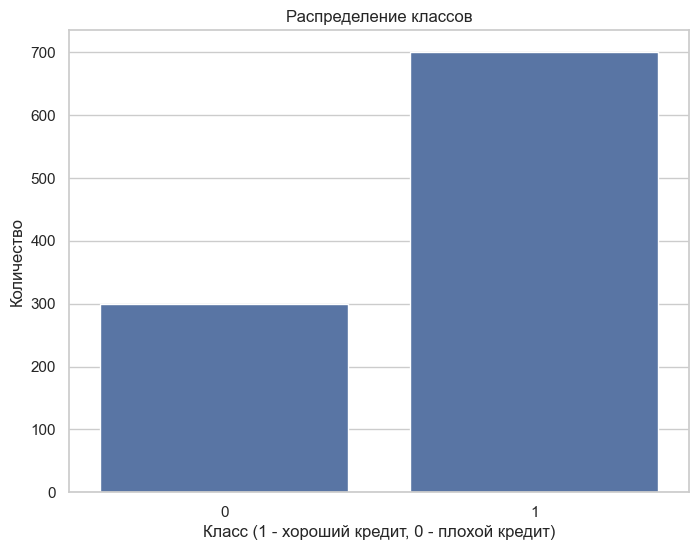

In [32]:
# Проверка распределения целевой переменной
# В наборе данных German Credit Data: 1 - хороший клиент, 2 - плохой клиент
# Преобразуем 2 -> 0 (плохой), 1 -> 1 (хороший)
df['class'] = df['class'].map({1: 1, 2: 0})

print("Распределение целевой переменной:")
print(df['class'].value_counts())
print(f"Процент хороших клиентов: {df['class'].mean()*100:.2f}%")
print(f"Процент плохих клиентов: {(1-df['class'].mean())*100:.2f}%")

# Визуализация распределения
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Распределение классов')
plt.xlabel('Класс (1 - хороший кредит, 0 - плохой кредит)')
plt.ylabel('Количество')
plt.show()

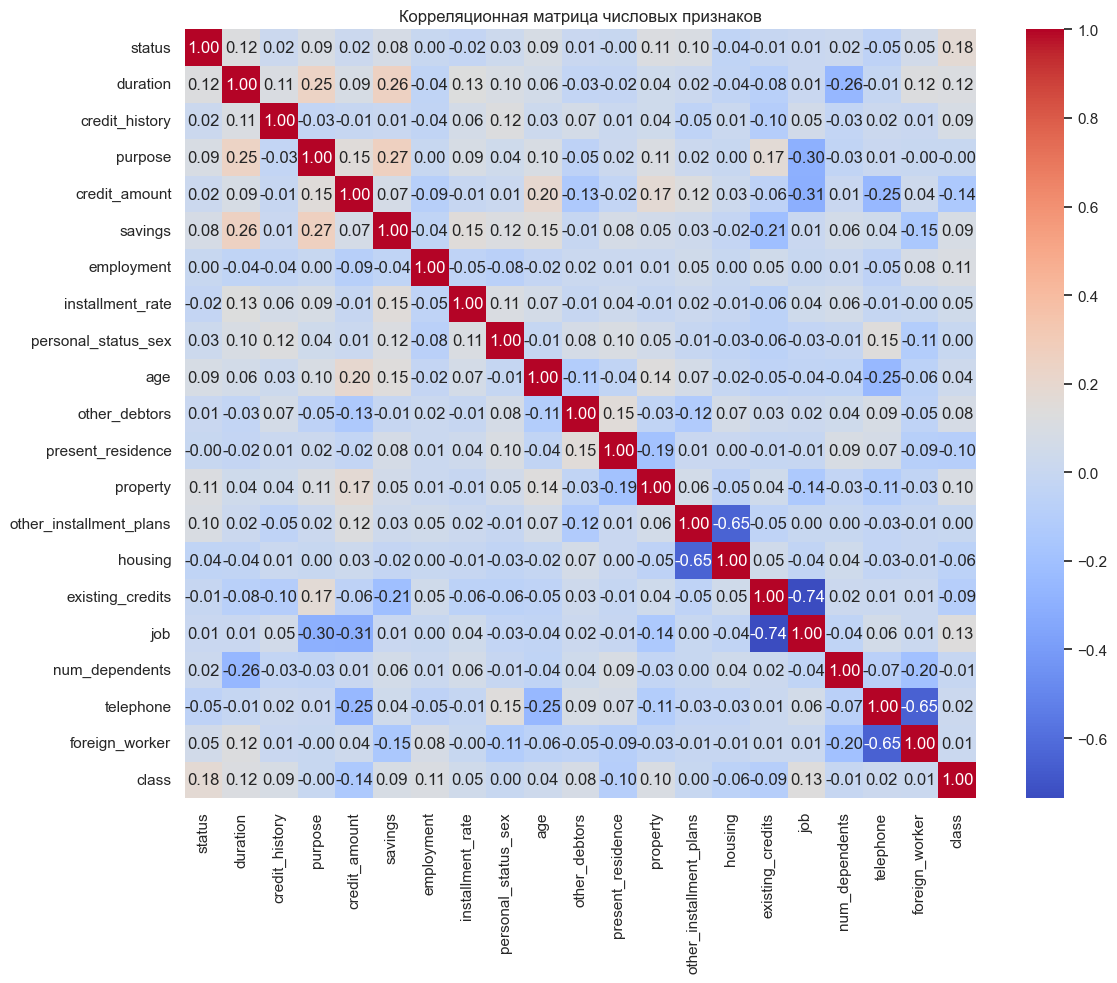

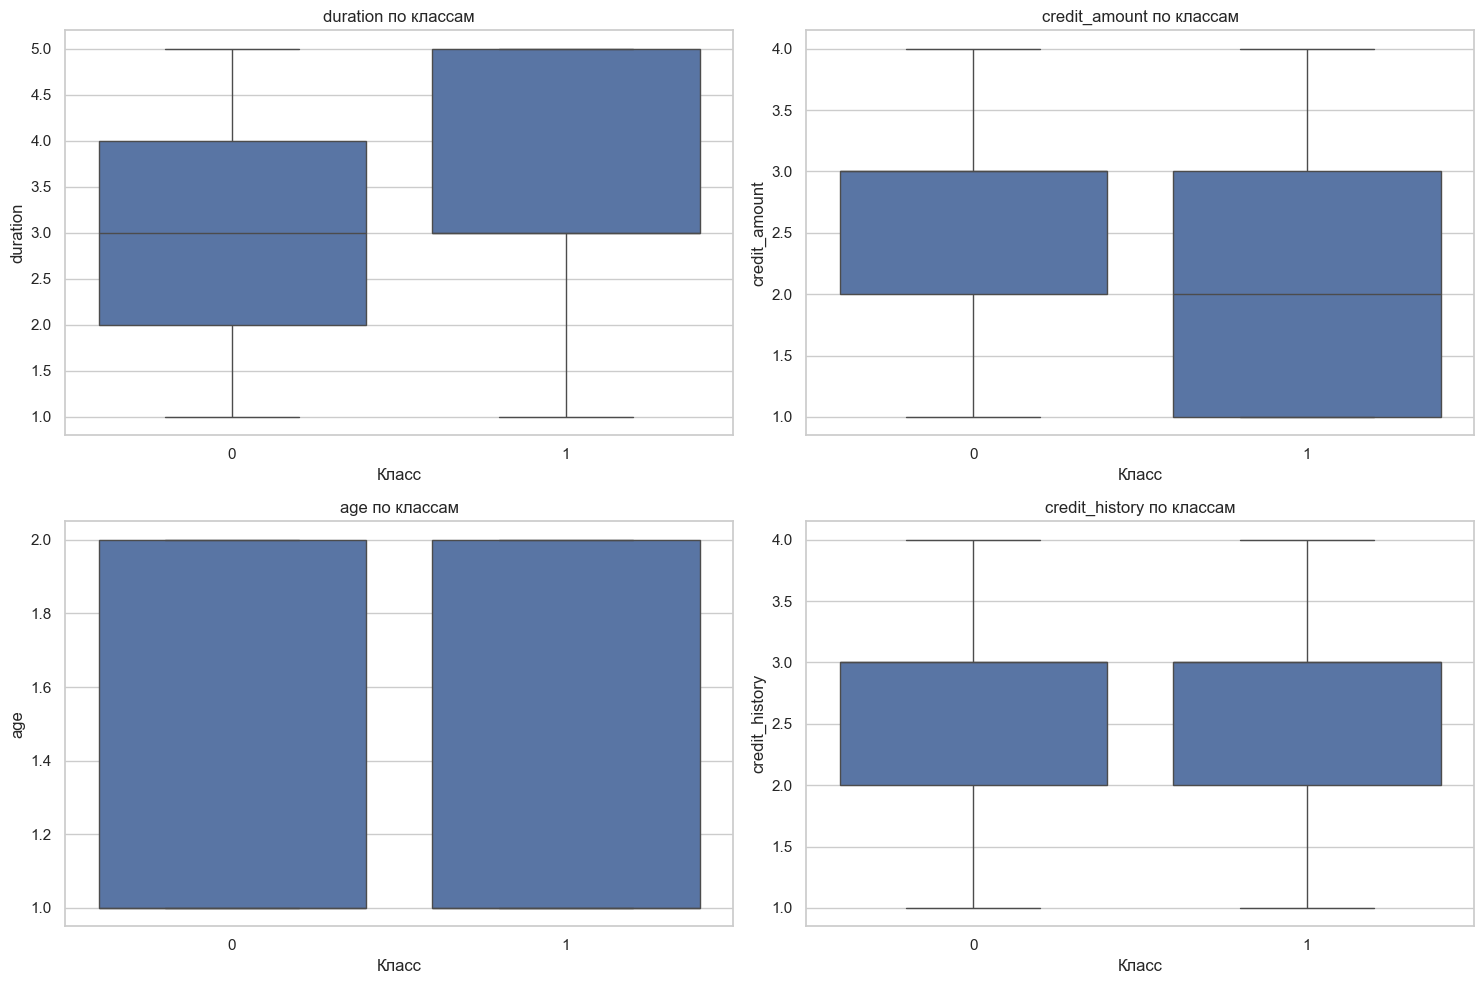

In [33]:
# Корреляция между числовыми признаками
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

# Распределение некоторых ключевых признаков по классам
key_features = ['duration', 'credit_amount', 'age', 'credit_history']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'{feature} по классам')
    plt.xlabel('Класс')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [34]:
# Разделение на признаки и целевую переменную
X = df.drop('class', axis=1)
y = df['class']

# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (800, 20)
Размер тестовой выборки: (200, 20)


Метрики базовой модели:
Accuracy: 0.6000
Precision: 0.7586
Recall: 0.6286
F1 Score: 0.6875
ROC AUC: 0.5876


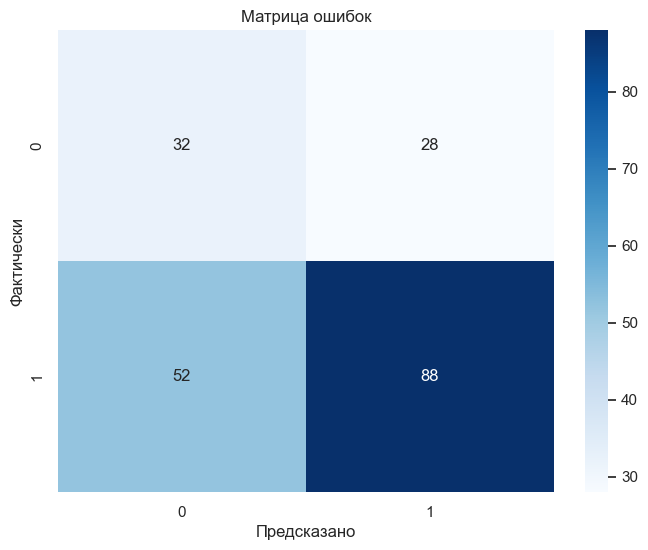

In [35]:
# Базовая модель XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    scale_pos_weight=(1-y_train.mean())/y_train.mean()  # Учитываем несбалансированность классов
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Оценка модели
print("Метрики базовой модели:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.show()

In [36]:
# Определение параметров для перебора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV с кросс-валидацией
grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Обучение на GridSearchCV
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания с помощью лучшей модели
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Оценка лучшей модели
print("\nМетрики лучшей модели:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Метрики лучшей модели:
Accuracy: 0.6950
Precision: 0.7453
Recall: 0.8571
F1 Score: 0.7973
ROC AUC: 0.6108


In [37]:
# 1. Балансировка данных с использованием SMOTE
from imblearn.over_sampling import SMOTE

# Проверяем баланс классов
print("Распределение классов:")
print(y_train.value_counts())
print(f"Соотношение классов: {y_train.mean():.2f}/{1-y_train.mean():.2f}")

# Применяем SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nПосле SMOTE:")
print(f"Размер обучающей выборки: {X_train_balanced.shape}")
print(pd.Series(y_train_balanced).value_counts())

# Проверка версии XGBoost
import xgboost as xgb
print(f"Версия XGBoost: {xgb.__version__}")

# 2. Обучение XGBoost на сбалансированных данных с оптимальными параметрами
balanced_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    **grid_search.best_params_  # Используем лучшие параметры из GridSearchCV
)

# Самый простой вызов fit() без дополнительных параметров
balanced_model.fit(X_train_balanced, y_train_balanced)

# Оценка модели на сбалансированных данных
y_pred_balanced = balanced_model.predict(X_test)
y_pred_proba_balanced = balanced_model.predict_proba(X_test)[:, 1]

print("\nМетрики модели XGBoost на сбалансированных данных:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_balanced):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_balanced):.4f}")

# 3. Оптимизация порога принятия решения
from sklearn.metrics import precision_recall_curve

# Находим оптимальный порог по F1-мере
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_balanced)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
optimal_threshold_idx = np.argmax(f1_scores[:-1])  # исключаем последний элемент
optimal_threshold = thresholds[optimal_threshold_idx]

print(f"\nОптимальный порог принятия решения: {optimal_threshold:.4f}")
print(f"Максимальный F1-score при этом пороге: {f1_scores[optimal_threshold_idx]:.4f}")

# Применяем оптимальный порог
y_pred_optimal = (y_pred_proba_balanced >= optimal_threshold).astype(int)

print("\nМетрики с оптимальным порогом:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimal):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimal):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_optimal):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_optimal):.4f}")

# Сравним базовую модель и улучшенную модель с оптимальным порогом
print("\nСравнение моделей:")
comparison = pd.DataFrame({
    'Базовая модель': [
        accuracy_score(y_test, y_pred_best),
        precision_score(y_test, y_pred_best),
        recall_score(y_test, y_pred_best),
        f1_score(y_test, y_pred_best),
        roc_auc_score(y_test, y_pred_proba_best)
    ],
    'Улучшенная модель': [
        accuracy_score(y_test, y_pred_optimal),
        precision_score(y_test, y_pred_optimal),
        recall_score(y_test, y_pred_optimal),
        f1_score(y_test, y_pred_optimal),
        roc_auc_score(y_test, y_pred_proba_balanced)
    ]
}, index=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])

print(comparison)

# Если улучшенная модель лучше, используем ее дальше
if f1_score(y_test, y_pred_optimal) > f1_score(y_test, y_pred_best):
    best_model = balanced_model
    print("\nВыбрана улучшенная модель на сбалансированных данных с оптимальным порогом.")
else:
    print("\nВыбрана базовая модель.")

Распределение классов:
class
1    560
0    240
Name: count, dtype: int64
Соотношение классов: 0.70/0.30

После SMOTE:
Размер обучающей выборки: (1120, 20)
class
1    560
0    560
Name: count, dtype: int64
Версия XGBoost: 3.0.0

Метрики модели XGBoost на сбалансированных данных:
Accuracy: 0.6500
Precision: 0.7465
Recall: 0.7571
F1 Score: 0.7518
ROC AUC: 0.6036

Оптимальный порог принятия решения: 0.1935
Максимальный F1-score при этом пороге: 0.8235

Метрики с оптимальным порогом:
Accuracy: 0.7000
Precision: 0.7000
Recall: 1.0000
F1 Score: 0.8235

Сравнение моделей:
           Базовая модель  Улучшенная модель
Accuracy         0.695000           0.700000
Precision        0.745342           0.700000
Recall           0.857143           1.000000
F1               0.797342           0.823529
ROC AUC          0.610833           0.603571

Выбрана улучшенная модель на сбалансированных данных с оптимальным порогом.


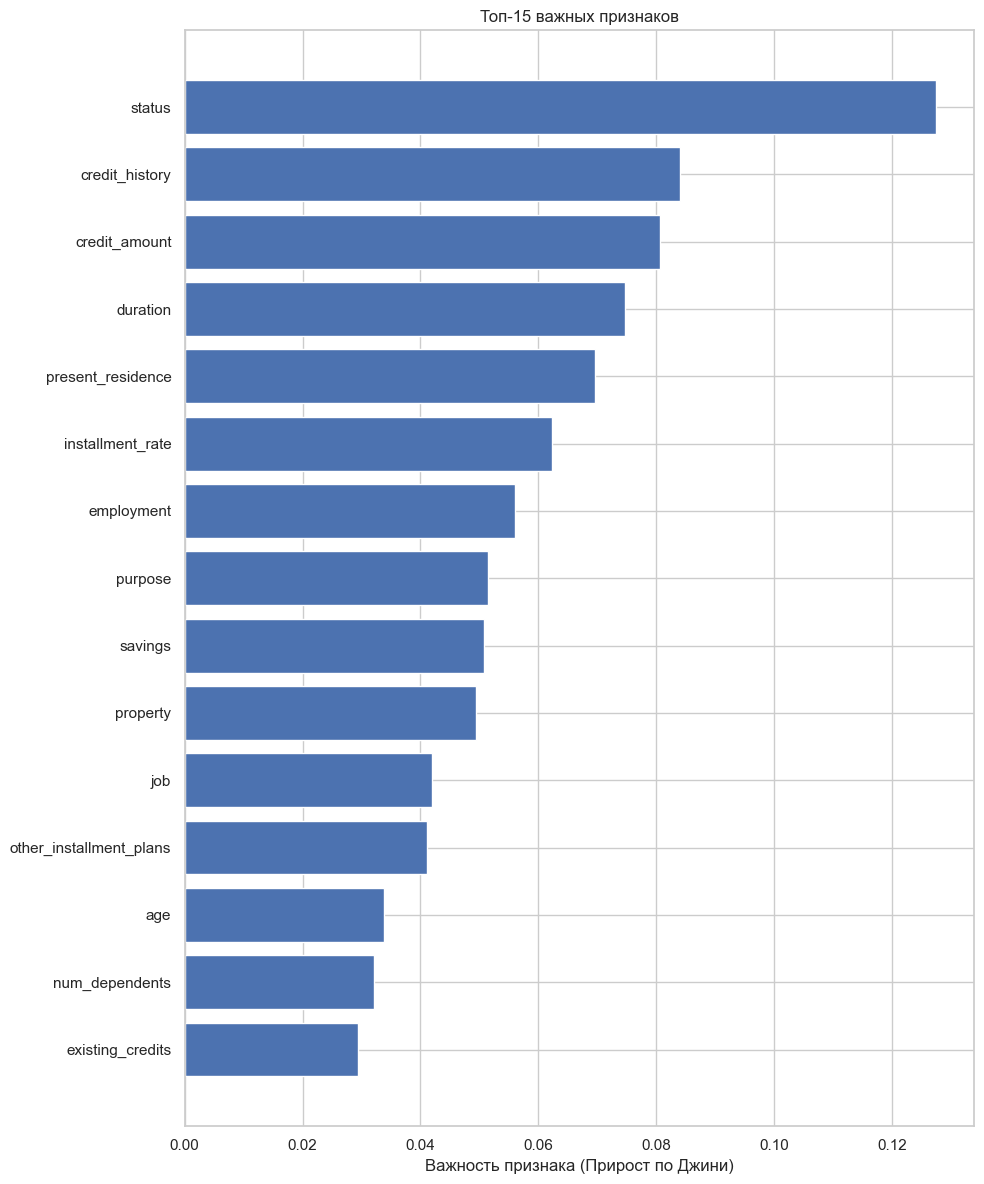

In [38]:
# Важность признаков
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 12))
plt.barh(X.columns[sorted_idx][-15:], feature_importance[sorted_idx][-15:])
plt.xlabel('Важность признака (Прирост по Джини)')
plt.title('Топ-15 важных признаков')
plt.tight_layout()
plt.show()

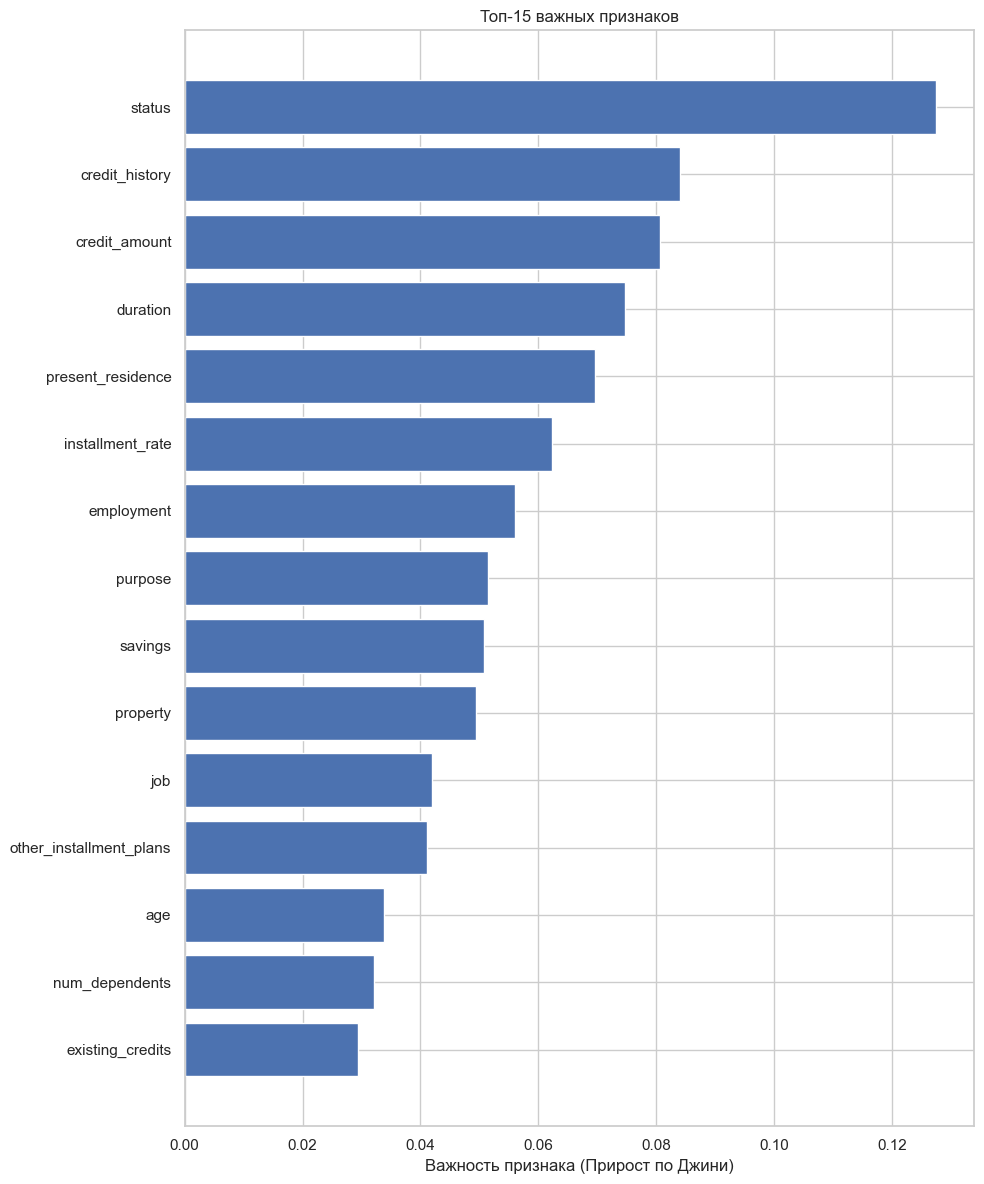

In [39]:
# Важность признаков
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 12))
plt.barh(X.columns[sorted_idx][-15:], feature_importance[sorted_idx][-15:])
plt.xlabel('Важность признака (Прирост по Джини)')
plt.title('Топ-15 важных признаков')
plt.tight_layout()
plt.show()

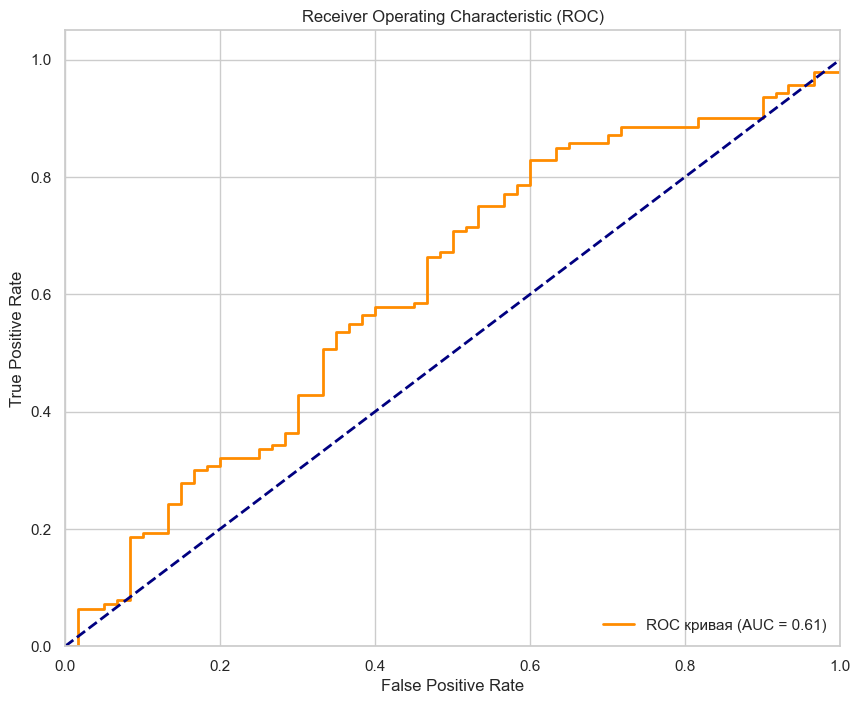

In [40]:
# Построение ROC-кривой
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [47]:
# Сохранение лучшей модели после оптимизации порога
import pickle

# Сохраняем в словаре модель, оптимальный порог и другие необходимые данные
model_data = {
    'model': best_model,  # ваша лучшая модель (balanced_model или та, которую выбрали)
    'optimal_threshold': optimal_threshold,  # оптимальный порог
    'scaler': scaler,  # если использовали scaler
    'required_features': X_train.columns.tolist()  # список используемых признаков
}

# Сохраняем в файл
with open('german_credit_xgboost_final.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Модель успешно сохранена в файл german_credit_xgboost_final.pkl")

Модель успешно сохранена в файл german_credit_xgboost_final.pkl


In [42]:
# Модифицированная функция predict_credit_risk для использования оптимального порога
def predict_credit_risk(client_data, model=best_model, scaler=scaler, threshold=optimal_threshold):
    """
    Оценка кредитоспособности нового клиента с оптимальным порогом принятия решения
    
    Параметры:
    client_data (dict): Словарь с данными клиента
    model: Обученная модель
    scaler: Обученный StandardScaler
    threshold: Оптимальный порог для классификации
    
    Возвращает:
    tuple: (Прогноз (1-хороший, 0-плохой), Вероятность хорошего исхода)
    """
    # Получаем список признаков, которые ожидает модель
    expected_features = X_train.columns.tolist()
    
    # Создаем DataFrame с нужными признаками, заполняя отсутствующие нулями
    client_df = pd.DataFrame(columns=expected_features)
    client_df.loc[0] = 0  # Создаем одну строку с нулями
    
    # Заполняем значениями из client_data для тех признаков, которые есть в словаре
    for feature in client_data:
        if feature in expected_features:
            client_df.loc[0, feature] = client_data[feature]
    
    # Проверяем, все ли признаки заполнены
    if client_df.isnull().any().any():
        missing_features = client_df.columns[client_df.isnull().any()].tolist()
        print(f"Внимание: отсутствуют значения для признаков: {missing_features}")
    
    # Масштабирование данных
    client_scaled = scaler.transform(client_df)
    
    # Предсказание
    probability = model.predict_proba(client_scaled)[0, 1]
    
    # Используем оптимальный порог вместо стандартного 0.5
    prediction = int(probability >= threshold)
    
    return prediction, probability

In [43]:
# Подключение к PostgreSQL с помощью SQLAlchemy
from sqlalchemy import create_engine, Column, Integer, Float, String, Boolean, DateTime
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from datetime import datetime

# Параметры подключения к PostgreSQL
DB_USER = 'sleep'
DB_PASSWORD = ''  # Замените на свой пароль
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'bank_data'

# Строка подключения к PostgreSQL
connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Создание движка SQLAlchemy
engine = create_engine(connection_string)

# Создание базового класса для ORM-моделей
Base = declarative_base()

# Определение ORM-модели для таблицы с исходными данными
class GermanCreditData(Base):
    __tablename__ = 'german_credit_data'
    
    id = Column(Integer, primary_key=True)
    status = Column(Integer)
    duration = Column(Integer)
    credit_history = Column(Integer)
    purpose = Column(Integer)
    credit_amount = Column(Integer)
    savings = Column(Integer)
    employment = Column(Integer)
    installment_rate = Column(Integer)
    personal_status_sex = Column(Integer)
    other_debtors = Column(Integer)
    present_residence = Column(Integer)
    property = Column(Integer)
    age = Column(Integer)
    other_installment_plans = Column(Integer)
    housing = Column(Integer)
    existing_credits = Column(Integer)
    job = Column(Integer)
    num_dependents = Column(Integer)
    telephone = Column(Integer)
    foreign_worker = Column(Integer)
    class_label = Column(Integer)

# Определение ORM-модели для таблицы с предсказаниями
class CreditPrediction(Base):
    __tablename__ = 'credit_predictions'
    
    id = Column(Integer, primary_key=True)
    status = Column(Integer)
    duration = Column(Integer)
    credit_history = Column(Integer)
    purpose = Column(Integer)
    credit_amount = Column(Integer)
    savings = Column(Integer)
    employment = Column(Integer)
    installment_rate = Column(Integer)
    personal_status_sex = Column(Integer)
    other_debtors = Column(Integer)
    present_residence = Column(Integer)
    property = Column(Integer)
    age = Column(Integer)
    other_installment_plans = Column(Integer)
    housing = Column(Integer)
    existing_credits = Column(Integer)
    job = Column(Integer)
    num_dependents = Column(Integer)
    telephone = Column(Integer)
    foreign_worker = Column(Integer)
    actual_class = Column(Integer)
    predicted_class = Column(Integer)
    probability_good = Column(Float)

# Определение ORM-модели для таблицы с заявками на кредит
class CreditApplication(Base):
    __tablename__ = 'credit_applications'
    
    id = Column(Integer, primary_key=True)
    application_date = Column(DateTime, default=datetime.now)
    status = Column(Integer)
    duration = Column(Integer)
    credit_history = Column(Integer)
    purpose = Column(Integer)
    credit_amount = Column(Integer)
    savings = Column(Integer)
    employment = Column(Integer)
    installment_rate = Column(Integer)
    personal_status_sex = Column(Integer)
    other_debtors = Column(Integer)
    present_residence = Column(Integer)
    property = Column(Integer)
    age = Column(Integer)
    other_installment_plans = Column(Integer)
    housing = Column(Integer)
    existing_credits = Column(Integer)
    job = Column(Integer)
    num_dependents = Column(Integer)
    telephone = Column(Integer)
    foreign_worker = Column(Integer)
    predicted_class = Column(Integer)
    probability_good = Column(Float)
    
# Создание таблиц в базе данных
Base.metadata.create_all(engine)

print("Таблицы успешно созданы в PostgreSQL")

Таблицы успешно созданы в PostgreSQL


In [44]:
# Загрузка исходных данных в PostgreSQL
def load_data_to_postgresql(df, engine):
    """
    Загружает данные в таблицу german_credit_data
    
    Параметры:
    df (DataFrame): DataFrame с данными
    engine: SQLAlchemy engine для подключения к PostgreSQL
    """
    # Копируем DataFrame и переименовываем столбец 'class' в 'class_label'
    # PostgreSQL не разрешает использовать зарезервированные слова как имена столбцов
    df_copy = df.copy()
    if 'class' in df_copy.columns:
        df_copy = df_copy.rename(columns={'class': 'class_label'})
    
    # Загрузка данных в PostgreSQL
    df_copy.to_sql('german_credit_data', engine, if_exists='replace', index=False)
    
    # Также создаем таблицу с предсказаниями
    df_with_predictions = df_copy.copy()
    
    # Вычисляем предсказания для всех данных
    X_data = df_with_predictions.drop('class_label', axis=1)
    predictions = best_model.predict(X_data)
    probabilities = best_model.predict_proba(X_data)[:, 1]
    
    # Добавляем столбцы с предсказаниями
    df_with_predictions['actual_class'] = df_with_predictions['class_label']
    df_with_predictions['predicted_class'] = predictions
    df_with_predictions['probability_good'] = probabilities
    
    # Загружаем в PostgreSQL
    df_with_predictions.to_sql('credit_predictions', engine, if_exists='replace', index=False)
    
    return len(df_copy)

# Запускаем загрузку данных
num_records = load_data_to_postgresql(df, engine)
print(f"Загружено {num_records} записей в базу данных PostgreSQL")

Загружено 1000 записей в базу данных PostgreSQL


In [46]:
# Функция для добавления нового клиента в базу данных PostgreSQL
# Определение примера клиента для тестирования функции
example_client = {
    'status': 1,
    'duration': 24,
    'credit_history': 2,
    'purpose': 4,
    'credit_amount': 50,
    'savings': 1,
    'employment': 3,
    'installment_rate': 3,
    'personal_status_sex': 2,
    'other_debtors': 1,
    'present_residence': 30,
    'property': 3,
    'age': 1,
    'other_installment_plans': 1,
    'housing': 1,
    'existing_credits': 1,
    'job': 0,
    'num_dependents': 0,
    'telephone': 1,
    'foreign_worker': 0
    # Дополнительные поля можно добавить при необходимости
}




def add_client_to_postgres(client_data, engine=engine):
    """
    Добавляет нового клиента в PostgreSQL с предсказанием кредитоспособности
    
    Параметры:
    client_data (dict): Словарь с данными клиента
    engine: SQLAlchemy engine для подключения к PostgreSQL
    
    Возвращает:
    int: ID добавленной записи
    """
    # Получаем предсказание
    prediction, probability = predict_credit_risk(client_data)
    
    # Создаем копию данных клиента
    application_data = client_data.copy()
    
    # Добавляем предсказание в данные клиента
    application_data['predicted_class'] = int(prediction)
    application_data['probability_good'] = float(probability)
    
    # Создаем сессию SQLAlchemy
    Session = sessionmaker(bind=engine)
    session = Session()
    
    try:
        # Создаем новый объект CreditApplication
        new_application = CreditApplication(**application_data)
        
        # Добавляем в сессию и коммитим
        session.add(new_application)
        session.commit()
        
        # Получаем ID
        application_id = new_application.id
        
        return application_id
    except Exception as e:
        session.rollback()
        print(f"Ошибка при добавлении клиента: {e}")
        return None
    finally:
        session.close()

# Пример использования
client_id = add_client_to_postgres(example_client)
print(f"Клиент добавлен в базу данных PostgreSQL с ID: {client_id}")

Клиент добавлен в базу данных PostgreSQL с ID: 3
